<a href="https://www.kaggle.com/code/patimejia/exercise-introduction?scriptVersionId=110132320" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**This notebook is an exercise in the [Intermediate Machine Learning](https://www.kaggle.com/learn/intermediate-machine-learning) course.  You can reference the tutorial at [this link](https://www.kaggle.com/alexisbcook/introduction).**

---


# Click here to find this [submission's](https://www.kaggle.com/code/patimejia/exercise-introduction?scriptVersionId=109986476&cellId=32) work.

As a warm-up, you'll review some machine learning fundamentals and submit your initial results to a Kaggle competition.

# Setup

The questions below will give you feedback on your work. Run the following cell to set up the feedback system.

In [1]:
# Set up code checking
import os
if not os.path.exists("../input/train.csv"):
    os.symlink("../input/home-data-for-ml-course/train.csv", "../input/train.csv")  
    os.symlink("../input/home-data-for-ml-course/test.csv", "../input/test.csv")  
from learntools.core import binder
binder.bind(globals())
from learntools.ml_intermediate.ex1 import *
print("Setup Complete")

Setup Complete


You will work with data from the [Housing Prices Competition for Kaggle Learn Users](https://www.kaggle.com/c/home-data-for-ml-course) to predict home prices in Iowa using 79 explanatory variables describing (almost) every aspect of the homes.  

![Ames Housing dataset image](https://i.imgur.com/lTJVG4e.png)

Run the next code cell without changes to load the training and validation features in `X_train` and `X_valid`, along with the prediction targets in `y_train` and `y_valid`.  The test features are loaded in `X_test`.  (_If you need to review **features** and **prediction targets**, please check out [this short tutorial](https://www.kaggle.com/dansbecker/your-first-machine-learning-model).  To read about model **validation**, look [here](https://www.kaggle.com/dansbecker/model-validation).  Alternatively, if you'd prefer to look through a full course to review all of these topics, start [here](https://www.kaggle.com/learn/machine-learning).)_

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the data
X_full = pd.read_csv('../input/train.csv', index_col='Id')
X_test_full = pd.read_csv('../input/test.csv', index_col='Id')

# Obtain target and predictors
y = X_full.SalePrice
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = X_full[features].copy()
X_test = X_test_full[features].copy()

# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

Use the next cell to print the first several rows of the data. It's a nice way to get an overview of the data you will use in your price prediction model.

In [3]:
X_train.head()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
Id,,,,,,,
619,11694,2007,1828,0,2,3,9
871,6600,1962,894,0,1,2,5
93,13360,1921,964,0,1,2,5
818,13265,2002,1689,0,2,3,7
303,13704,2001,1541,0,2,3,6


The next code cell defines five different random forest models.  Run this code cell without changes.  (_To review **random forests**, look [here](https://www.kaggle.com/dansbecker/random-forests)._)

In [4]:
from sklearn.ensemble import RandomForestRegressor

# Define the models
model_1 = RandomForestRegressor(n_estimators=50, random_state=0)
model_2 = RandomForestRegressor(n_estimators=100, random_state=0)
model_3 = RandomForestRegressor(n_estimators=100, criterion='absolute_error', random_state=0)
model_4 = RandomForestRegressor(n_estimators=200, min_samples_split=20, random_state=0)
model_5 = RandomForestRegressor(n_estimators=100, max_depth=7, random_state=0)

models = [model_1, model_2, model_3, model_4, model_5]

To select the best model out of the five, we define a function `score_model()` below.  This function returns the mean absolute error (MAE) from the validation set.  Recall that the best model will obtain the lowest MAE.  (_To review **mean absolute error**, look [here](https://www.kaggle.com/dansbecker/model-validation).)_

Run the code cell without changes.

In [5]:
from sklearn.metrics import mean_absolute_error

# Function for comparing different models
def score_model(model, X_t=X_train, X_v=X_valid, y_t=y_train, y_v=y_valid):
    model.fit(X_t, y_t)
    preds = model.predict(X_v)
    return mean_absolute_error(y_v, preds)

for i in range(0, len(models)):
    mae = score_model(models[i])
    print("Model %d MAE: %d" % (i+1, mae))

Model 1 MAE: 24015
Model 2 MAE: 23740
Model 3 MAE: 23528
Model 4 MAE: 23996
Model 5 MAE: 23706


# > added code below
makes an array to hold or append all MAE results

In [6]:
from sklearn.metrics import mean_absolute_error

# Function for comparing different models
def score_model(model, X_t=X_train, X_v=X_valid, y_t=y_train, y_v=y_valid):
    model.fit(X_t, y_t)
    preds = model.predict(X_v)
    return mean_absolute_error(y_v, preds)
# create a dictionary to store the results: mae_results
mae_results = []
for i in range(0, len(models)):
    mae = score_model(models[i])
    print("Model %d MAE: %d" % (i+1, mae))
    mae_results.append(mae)

Model 1 MAE: 24015
Model 2 MAE: 23740
Model 3 MAE: 23528
Model 4 MAE: 23996
Model 5 MAE: 23706


# Step 1: Evaluate several models

Use the above results to fill in the line below.  Which model is the best model?  Your answer should be one of `model_1`, `model_2`, `model_3`, `model_4`, or `model_5`.

# > added code below


In [7]:
# find the min of mae_results
min_mae_results = min(mae_results)

# print min mae_results
print("min mae_results: %d" % min_mae_results)

# find index of min mae_results or best model
best_model_index = mae_results.index(min_mae_results)+1

# print best model index    
print("best model index: %d" % best_model_index)

# get the best model from models list
best_model = models[best_model_index-1]

print("best model: %s" % best_model)

# make best_model equals the word model_ concatenated with index of best model
best_model = "model_" + str(best_model_index)
print(best_model)


min mae_results: 23528
best model index: 3
best model: RandomForestRegressor(criterion='absolute_error', random_state=0)
model_3


In [8]:
# Fill in the best model
best_model = model_3

# Check your answer
step_1.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [9]:
# Lines below will give you a hint or solution code
#step_1.hint()
#step_1.solution()

# Step 2: Generate test predictions

Great. You know how to evaluate what makes an accurate model. Now it's time to go through the modeling process and make predictions. In the line below, create a Random Forest model with the variable name `my_model`.

In [10]:
# Define a model
my_model = best_model


# Check your answer
step_2.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [11]:
# Lines below will give you a hint or solution code
# step_2.hint()
# step_2.solution()

Run the next code cell without changes.  The code fits the model to the training and validation data, and then generates test predictions that are saved to a CSV file.  These test predictions can be submitted directly to the competition!

In [12]:
# Fit the model to the training data
my_model.fit(X, y)

# Generate test predictions
preds_test = my_model.predict(X_test)

# Save predictions in format used for competition scoring
output = pd.DataFrame({'Id': X_test.index,
                       'SalePrice': preds_test})
output.to_csv('model_3_submission.csv', index=False)

In [13]:
output.head(5)

,Id,SalePrice
0,1461,119433.08
1,1462,158367.50
2,1463,185351.21
3,1464,178343.12
4,1465,192898.29


# First xgboost model trial

In [14]:
# vizualize the results with xgboost
import xgboost as xgb

# create a DMatrix for training data
dtrain = xgb.DMatrix(X_train, label=y_train)

# create a DMatrix for validation data
dvalid = xgb.DMatrix(X_valid, label=y_valid)

# create a DMatrix for test data
dtest = xgb.DMatrix(X_test)

# create a watchlist
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]
# set the parameters
params = {'min_child_weight': 1, 'eta': 0.3, 'colsample_bytree': 0.3, 'max_depth': 5,
            'subsample': 0.8, 'lambda': 1., 'nthread': -1, 'booster' : 'gbtree', 'silent': 1,
            'eval_metric': 'mae', 'objective': 'reg:linear'}

# train the model
model = xgb.train(params, dtrain, 400, watchlist, early_stopping_rounds=50,
                    maximize=False, verbose_eval=10)

# make predictions
xgb_preds = model.predict(dtest)

# save the predictions
output = pd.DataFrame({'Id': X_test.index,
                          'SalePrice': xgb_preds})
output.to_csv('xgboost_submission.csv', index=False)


[16:32:10] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[16:32:10] WARNING: ../src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-mae:127461.68894	valid-mae:128129.16529
[10]	train-mae:23790.22124	valid-mae:29542.15382
[20]	train-mae:19577.27659	valid-mae:28433.69670


/opt/conda/lib/python3.7/site-packages/xgboost/core.py:571: FutureWarning: Pass `evals` as keyword args.  Passing these as positional arguments will be considered as error in future releases.
  format(", ".join(args_msg)), FutureWarning


[30]	train-mae:16402.40590	valid-mae:27420.08021
[40]	train-mae:14849.81379	valid-mae:26863.50754
[50]	train-mae:13624.89660	valid-mae:26604.69149
[60]	train-mae:12527.32402	valid-mae:26354.89060
[70]	train-mae:11585.66438	valid-mae:26182.98082
[80]	train-mae:10799.27131	valid-mae:26161.71260
[90]	train-mae:10050.21004	valid-mae:26322.26397
[100]	train-mae:9464.08558	valid-mae:26283.20230
[110]	train-mae:9006.88373	valid-mae:26282.14194
[120]	train-mae:8565.71131	valid-mae:26430.25827
[125]	train-mae:8399.04631	valid-mae:26522.56020


In [15]:
output.head(5)

,Id,SalePrice
0,1461,119771.375000
1,1462,161352.875000
2,1463,189995.781250
3,1464,158456.234375
4,1465,187781.921875


In [16]:
# return the mean absolute error mae for the model xgboost
mae = mean_absolute_error(y_valid, model.predict(dvalid))
print("xgboost, Mean Absolute Error: " + str(mae))

xgboost, Mean Absolute Error: 26545.00540453767


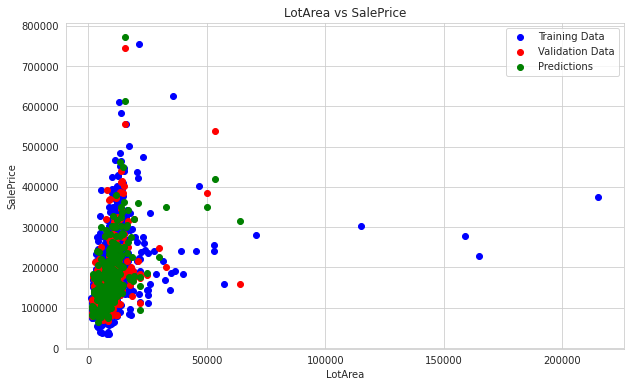

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

preds_valid = model.predict(dvalid) # dvalid is a DMatrix   

# visulize predictions with a graph
# set the style of the graph
sns.set_style('whitegrid')

# set the size of the graph
plt.figure(figsize=(10, 6))

# create a scatter plot of the data
plt.scatter(X_train['LotArea'], y_train, color='blue', label='Training Data')
plt.scatter(X_valid['LotArea'], y_valid, color='red', label='Validation Data')

# create a scatter plot of the predictions
plt.scatter(X_valid['LotArea'], preds_valid, color='green', label='Predictions')

# set the title of the graph
plt.title('LotArea vs SalePrice')

# set the x and y labels
plt.xlabel('LotArea')
plt.ylabel('SalePrice')

# set the legend
plt.legend()

# show the graph
plt.show()

ends xgboost test
_______________

# Submission

Mean Absolute Error (MAE) is the metric used in this competition. The MAE is the average of the absolute differences between predicted and actual home prices. The MAE is a measure of prediction error. The lower the MAE, the better the model.

## Model description:
- Random Forest:
    - `'criterion': 'absolute_error'`
    - `'max_depth': 7`
    - `'random_state': 42`
- MAE: 23240

Defining 12 models with different parameter settings.

In [18]:
from sklearn.ensemble import RandomForestRegressor

# Define the models
model_1 = RandomForestRegressor(n_estimators=50, random_state=0)
model_2 = RandomForestRegressor(n_estimators=100, random_state=0)
model_3 = RandomForestRegressor(n_estimators=100, criterion='absolute_error', random_state=0)
model_4 = RandomForestRegressor(n_estimators=200, min_samples_split=20, random_state=0)
model_5 = RandomForestRegressor(n_estimators=100, max_depth=7, random_state=0)
model_6 = RandomForestRegressor(n_estimators=100, max_depth=7, min_samples_split=20, random_state=0)
model_7 = RandomForestRegressor(n_estimators=100, max_depth=7, min_samples_split=20, max_features=0.5, random_state=0)
model_8 = RandomForestRegressor(n_estimators=100, criterion='absolute_error', max_depth=7, random_state=0)
model_9 = RandomForestRegressor(n_estimators=100, criterion='absolute_error', max_depth=7, min_samples_split=20, random_state=0)
model_10 = RandomForestRegressor(n_estimators=100, criterion='absolute_error', max_depth=7, min_samples_split=20, max_features=0.5, random_state=0)
model_11 = RandomForestRegressor(n_estimators=100, criterion='absolute_error', max_depth=7, random_state=42)
model_12 = RandomForestRegressor(n_estimators=100, criterion='absolute_error', max_depth=7, min_samples_split=20, random_state=1)


models = [model_1, model_2, model_3, model_4, model_5, model_6, model_7, model_8, model_9, model_10, model_11, model_12]

Creating an array to hold all MAE results.

In [19]:
from sklearn.metrics import mean_absolute_error

# Function for comparing different models
def score_model(model, X_t=X_train, X_v=X_valid, y_t=y_train, y_v=y_valid):
    model.fit(X_t, y_t)
    preds = model.predict(X_v)
    return mean_absolute_error(y_v, preds)

# create a dictionary to store the results: mae_results*
mae_results = []

for i in range(0, len(models)):
    mae = score_model(models[i])
    print("Model %d MAE: %d" % (i+1, mae))

    # append the mae to the dictionary*
    mae_results.append(mae) 



Model 1 MAE: 24015
Model 2 MAE: 23740
Model 3 MAE: 23528
Model 4 MAE: 23996
Model 5 MAE: 23706
Model 6 MAE: 23986
Model 7 MAE: 25247
Model 8 MAE: 23496
Model 9 MAE: 24278
Model 10 MAE: 25335
Model 11 MAE: 23240
Model 12 MAE: 24257


Finding the minimum of all MAE results.

In [20]:
# find the min of mae_results
min_mae_results = min(mae_results)

# print min mae_results
print("min mae_results: %d" % min_mae_results)

# find index of min mae_results or best model
best_model_index = mae_results.index(min_mae_results)+1

# print best model index    
print("best model index: %d" % best_model_index)

# get the best model from models list
best_model = models[best_model_index-1]

print("best model: %s" % best_model)


min mae_results: 23240
best model index: 11
best model: RandomForestRegressor(criterion='absolute_error', max_depth=7, random_state=42)


Defining the best model to be `my_model`.

In [21]:
# Define a model
my_model = best_model

Fitting the model and generating a submission file with predictions.

In [22]:
# Fit the model to the training data
my_model.fit(X, y)

# Generate test predictions
preds_test = my_model.predict(X_test)

# Save predictions in format used for competition scoring
output = pd.DataFrame({'Id': X_test.index,
                       'SalePrice': preds_test})
output.to_csv('submission.csv', index=False)

Visualizing the first 10 predictions

In [23]:
output.head(10)

,Id,SalePrice
0,1461,128151.500
1,1462,162172.000
2,1463,182029.565
3,1464,181721.215
4,1465,186127.115
5,1466,190155.980
6,1467,183116.010
7,1468,179890.915
8,1469,195848.090
9,1470,123217.250


# Conclusion

We've built a model that can predict home prices in Iowa. We've also learned how to use the Kaggle competition system and change the hyperparameter `random_state` to obtain a lower MAE. This exercise was a great way to practice machine learning skills and see how models compare.

So far, our best Random Forest model has MAE 23240 using the parameters and hyperparameter below:
     `'criterion': 'absolute_error'`
     `'max_depth': 7`, and
     `'random_state': 42`

thank you for reading
__________________________

# Submit your results

Once you have successfully completed Step 2, you're ready to submit your results to the leaderboard!  First, you'll need to join the competition if you haven't already.  So open a new window by clicking on [this link](https://www.kaggle.com/c/home-data-for-ml-course).  Then click on the **Join Competition** button.  _(If you see a "Submit Predictions" button instead of a "Join Competition" button, you have already joined the competition, and don't need to do so again.)_

Next, follow the instructions below:
1. Begin by clicking on the **Save Version** button in the top right corner of the window.  This will generate a pop-up window.  
2. Ensure that the **Save and Run All** option is selected, and then click on the **Save** button.
3. This generates a window in the bottom left corner of the notebook.  After it has finished running, click on the number to the right of the **Save Version** button.  This pulls up a list of versions on the right of the screen.  Click on the ellipsis **(...)** to the right of the most recent version, and select **Open in Viewer**.  This brings you into view mode of the same page. You will need to scroll down to get back to these instructions.
4. Click on the **Output** tab on the right of the screen.  Then, click on the file you would like to submit, and click on the **Submit** button to submit your results to the leaderboard.

You have now successfully submitted to the competition!

If you want to keep working to improve your performance, select the **Edit** button in the top right of the screen. Then you can change your code and repeat the process. There's a lot of room to improve, and you will climb up the leaderboard as you work.


# Keep going

You've made your first model. But how can you quickly make it better?

Learn how to improve your competition results by incorporating columns with **[missing values](https://www.kaggle.com/alexisbcook/missing-values)**.

---




*Have questions or comments? Visit the [course discussion forum](https://www.kaggle.com/learn/intermediate-machine-learning/discussion) to chat with other learners.*